# 03 — Exploratory Data Analysis (EDA) Komentar YouTube Korupsi Whoosh

Notebook ini berisi analisis eksploratif terhadap dataset komentar YouTube
yang digunakan untuk tugas analisis sentimen.

Tujuan EDA:

1. Melihat gambaran umum dataset (jumlah data, kolom, tipe data).
2. Menganalisis distribusi label sentimen (negative, neutral, positive).
3. Menganalisis karakteristik teks:
   - Panjang komentar (jumlah karakter & jumlah kata).
   - Perbandingan panjang komentar per kelas sentimen.
4. Melihat kata-kata yang sering muncul pada setiap kelas sentimen
   (menggunakan teks yang sudah diproses).
5. Mengidentifikasi potensi masalah:
   - ketidakseimbangan kelas (class imbalance),
   - duplikasi data,
   - data kosong (missing values).

EDA ini menjadi dasar pemahaman kualitas data sebelum dilakukan
pembangunan model pada tahap berikutnya.

## Import Library

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS

## Load Dataset

In [3]:
df = pd.read_csv("../data/dataset_preprocessed.csv")

## Info Umum Dataset

In [5]:
print("Shape dataset:", df.shape)
print("\nInfo dataset:")
print(df.info())

print("\nContoh 5 baris pertama:")
df.head()


Shape dataset: (987, 9)

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   comment           987 non-null    object
 1   cleaning          987 non-null    object
 2   case_folding      987 non-null    object
 3   normalisasi       987 non-null    object
 4   tokenize          987 non-null    object
 5   stopword removal  987 non-null    object
 6   stemming_data     987 non-null    object
 7   sentiment         987 non-null    object
 8   label             987 non-null    int64 
dtypes: int64(1), object(8)
memory usage: 69.5+ KB
None

Contoh 5 baris pertama:


,comment,cleaning,case_folding,normalisasi,tokenize,stopword removal,stemming_data,sentiment,label
0,Yg benci ya apa aja salah.. \nYg seneng ya mak...,Yg benci ya apa aja salah \nYg seneng ya makin...,yg benci ya apa aja salah \nyg seneng ya makin...,yang benci ya apa saja salah yang senang ya ma...,"['yang', 'benci', 'ya', 'apa', 'saja', 'salah'...","['benci', 'ya', 'salah', 'senang', 'ya', 'sena...",benci ya salah senang ya senang nyinyir ya bah...,neutral,1
1,Bandung akan miliki kereta pajajaran dgn beaya...,Bandung akan miliki kereta pajajaran dgn beaya...,bandung akan miliki kereta pajajaran dgn beaya...,bandung akan miliki kereta pajajaran dengan be...,"['bandung', 'akan', 'miliki', 'kereta', 'pajaj...","['bandung', 'miliki', 'kereta', 'pajajaran', '...",bandung milik kereta pajajaran beaya murah who...,neutral,1
2,SUDAH JELAS GENG SOLO YANG HARUS BERTANGGUNG J...,SUDAH JELAS GENG SOLO YANG HARUS BERTANGGUNG J...,sudah jelas geng solo yang harus bertanggung j...,sudah jelas geng solo yang harus bertanggung j...,"['sudah', 'jelas', 'geng', 'solo', 'yang', 'ha...","['geng', 'solo', 'bertanggung', 'tangkap']",geng solo tanggung tangkap,negative,0
3,"Jokowi, Luhut, kroni2 yg harus bertanggungjaw...",Jokowi Luhut kroni yg harus bertanggungjawab ...,jokowi luhut kroni yg harus bertanggungjawab ...,jokowi luhut kroni yang harus bertanggungjawab...,"['jokowi', 'luhut', 'kroni', 'yang', 'harus', ...","['jokowi', 'luhut', 'kroni', 'bertanggungjawab...",jokowi luhut kroni bertanggungjawab bayar huta...,negative,0
4,Yg ditangkap gorengan yg makan duduk manis,Yg ditangkap gorengan yg makan duduk manis,yg ditangkap gorengan yg makan duduk manis,yang ditangkap gorengan yang makan duduk manis,"['yang', 'ditangkap', 'gorengan', 'yang', 'mak...","['ditangkap', 'gorengan', 'makan', 'duduk', 'm...",tangkap goreng makan duduk manis,neutral,1


## Cek Missing Value

In [6]:
df.isna().sum()

comment             0
cleaning            0
case_folding        0
normalisasi         0
tokenize            0
stopword removal    0
stemming_data       0
sentiment           0
label               0
dtype: int64

## Cek Duplikat

In [7]:
dup_by_text = df.duplicated(subset=["comment"]).sum()
dup_by_all  = df.duplicated().sum()

print("Duplikat berdasarkan kolom comment:", dup_by_text)
print("Duplikat berdasarkan semua kolom:", dup_by_all)

Duplikat berdasarkan kolom comment: 0
Duplikat berdasarkan semua kolom: 0


## Distribusi Label Sentimen

In [8]:
sent_counts = df["sentiment"].value_counts().sort_index()
sent_counts

sentiment
negative    645
neutral     309
positive     33
Name: count, dtype: int64

C:\Users\hafizh\AppData\Local\Temp\ipykernel_22600\3543547591.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


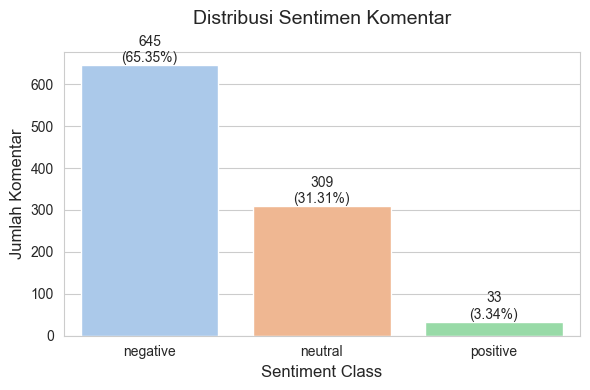

In [24]:
# Hitung distribusi sentimen
sentiment_count = df['sentiment'].value_counts()
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(
    x=sentiment_count.index,
    y=sentiment_count.values,
    palette='pastel'
)

plt.title('Distribusi Sentimen Komentar', fontsize=14, pad=20)
plt.xlabel('Sentiment Class', fontsize=12)
plt.ylabel('Jumlah Komentar', fontsize=12)

total = len(df['sentiment'])

# Tampilkan jumlah + persentase di atas bar
for i, count in enumerate(sentiment_count.values):
    percentage = f'{100 * count / total:.2f}%'
    ax.text(i, count + 0.5, f'{count}\n({percentage})', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Analisis Panjang Komentar

In [11]:
df["len_char"] = df["comment"].astype(str).str.len()
df["len_word"] = df["comment"].astype(str).str.split().apply(len)

df[["comment", "len_char", "len_word"]].head()

,comment,len_char,len_word
0,Yg benci ya apa aja salah.. \nYg seneng ya mak...,150,25
1,Bandung akan miliki kereta pajajaran dgn beaya...,98,17
2,SUDAH JELAS GENG SOLO YANG HARUS BERTANGGUNG J...,64,10
3,"Jokowi, Luhut, kroni2 yg harus bertanggungjaw...",246,35
4,Yg ditangkap gorengan yg makan duduk manis,42,7


In [12]:
df[["len_char", "len_word"]].describe()

,len_char,len_word
count,987.000000,987.000000
mean,113.640324,17.474164
std,181.970133,26.439415
min,3.000000,1.000000
25%,38.500000,6.000000
50%,74.000000,11.000000
75%,130.000000,20.000000
max,3985.000000,568.000000


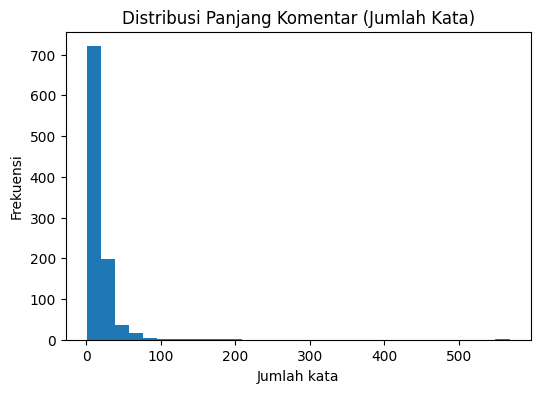

In [13]:
plt.figure(figsize=(6,4))
plt.hist(df["len_word"], bins=30)
plt.title("Distribusi Panjang Komentar (Jumlah Kata)")
plt.xlabel("Jumlah kata")
plt.ylabel("Frekuensi")
plt.show()

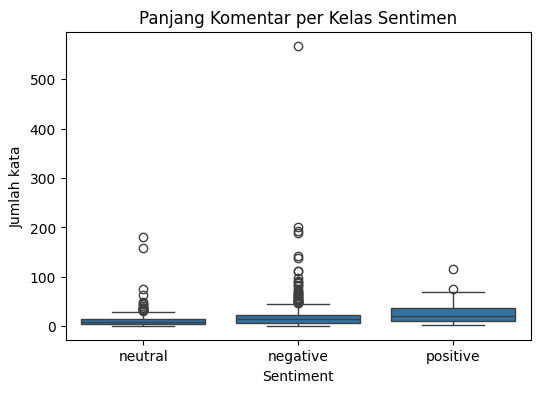

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="sentiment", y="len_word")
plt.title("Panjang Komentar per Kelas Sentimen")
plt.xlabel("Sentiment")
plt.ylabel("Jumlah kata")
plt.show()

## Kata yang Sering Muncul per Kelas Sentimen

In [15]:
text_col = "case_folding"   # ganti kalau mau pakai kolom lain

df[text_col].head()

0    yg benci ya apa aja salah \nyg seneng ya makin...
1    bandung akan miliki kereta pajajaran dgn beaya...
2    sudah jelas geng solo yang harus bertanggung j...
3    jokowi luhut kroni  yg harus bertanggungjawab ...
4           yg ditangkap gorengan yg makan duduk manis
Name: case_folding, dtype: object

In [17]:
def top_words_by_sentiment(df, label_col="sentiment", text_col="case_folding", n=20):
    results = {}
    for label in df[label_col].unique():
        subset = df[df[label_col] == label]
        all_tokens = " ".join(subset[text_col].astype(str)).split()
        counter = Counter(all_tokens)
        results[label] = counter.most_common(n)
    return results

top_words = top_words_by_sentiment(df, label_col="sentiment", text_col=text_col, n=20)
top_words


{'neutral': [('yg', 69),
  ('di', 61),
  ('yang', 43),
  ('dan', 37),
  ('ini', 36),
  ('itu', 34),
  ('pak', 31),
  ('tidak', 29),
  ('untuk', 25),
  ('bisa', 24),
  ('nya', 24),
  ('ada', 24),
  ('rakyat', 23),
  ('jokowi', 22),
  ('gak', 21),
  ('jadi', 21),
  ('kpk', 20),
  ('saya', 19),
  ('aja', 18),
  ('orang', 18)],
 'negative': [('yg', 228),
  ('di', 228),
  ('dan', 214),
  ('kpk', 163),
  ('jokowi', 153),
  ('rakyat', 143),
  ('yang', 137),
  ('itu', 122),
  ('ini', 118),
  ('nya', 102),
  ('ada', 100),
  ('negara', 91),
  ('tidak', 88),
  ('harus', 79),
  ('korupsi', 74),
  ('dari', 68),
  ('indonesia', 67),
  ('kereta', 67),
  ('proyek', 64),
  ('prabowo', 63)],
 'positive': [('dan', 26),
  ('yg', 17),
  ('whoosh', 11),
  ('dari', 11),
  ('ini', 10),
  ('tidak', 9),
  ('indonesia', 9),
  ('juga', 9),
  ('pak', 9),
  ('jokowi', 9),
  ('itu', 8),
  ('bukan', 8),
  ('busuk', 8),
  ('ada', 7),
  ('cepat', 7),
  ('mau', 7),
  ('rakyat', 7),
  ('yang', 6),
  ('bisa', 6),
  ('jadi

In [18]:
for label, words in top_words.items():
    print(f"\n=== Top kata untuk sentimen: {label} ===")
    for w, c in words:
        print(f"{w:20} : {c}")


=== Top kata untuk sentimen: neutral ===
yg                   : 69
di                   : 61
yang                 : 43
dan                  : 37
ini                  : 36
itu                  : 34
pak                  : 31
tidak                : 29
untuk                : 25
bisa                 : 24
nya                  : 24
ada                  : 24
rakyat               : 23
jokowi               : 22
gak                  : 21
jadi                 : 21
kpk                  : 20
saya                 : 19
aja                  : 18
orang                : 18

=== Top kata untuk sentimen: negative ===
yg                   : 228
di                   : 228
dan                  : 214
kpk                  : 163
jokowi               : 153
rakyat               : 143
yang                 : 137
itu                  : 122
ini                  : 118
nya                  : 102
ada                  : 100
negara               : 91
tidak                : 88
harus                : 79
korupsi             

## Bigram / kata frasa populer

In [20]:
def top_ngrams(texts, ngram_range=(2,2), top_k=20):
    vec = CountVectorizer(ngram_range=ngram_range, max_features=2000).fit(texts)
    bag = vec.transform(texts)
    sums = bag.sum(axis=0)
    freqs = [(word, sums[0, idx]) for word, idx in vec.vocabulary_.items()]
    freqs = sorted(freqs, key=lambda x: x[1], reverse=True)
    return freqs[:top_k]

for label in df["sentiment"].unique():
    subset = df[df["sentiment"] == label]
    ngrams = top_ngrams(subset[text_col].astype(str))
    print(f"\n=== Top bigram untuk sentimen: {label} ===")
    for w, c in ngrams:
        print(f"{w:30} : {c}")


=== Top bigram untuk sentimen: neutral ===
kereta cepat                   : 8
pak jokowi                     : 5
allahuakbar allahuakbar        : 5
bisa di                        : 4
tanggung jawab                 : 4
di atas                        : 4
rakyat bersuara                : 4
said didu                      : 4
kita berjuang                  : 4
berjuang berjihad              : 4
orang yang                     : 3
bayar utang                    : 3
kalau tidak                    : 3
pertama kali                   : 3
proyek yang                    : 3
tidak bisa                     : 3
pak mahfud                     : 3
kalo gak                       : 3
masuk akal                     : 3
apa yang                       : 3

=== Top bigram untuk sentimen: negative ===
kereta cepat                   : 35
rakyat indonesia               : 18
jokowi dan                     : 17
bertanggung jawab              : 14
rakyat yg                      : 13
pak prabowo                    

## WordCloud

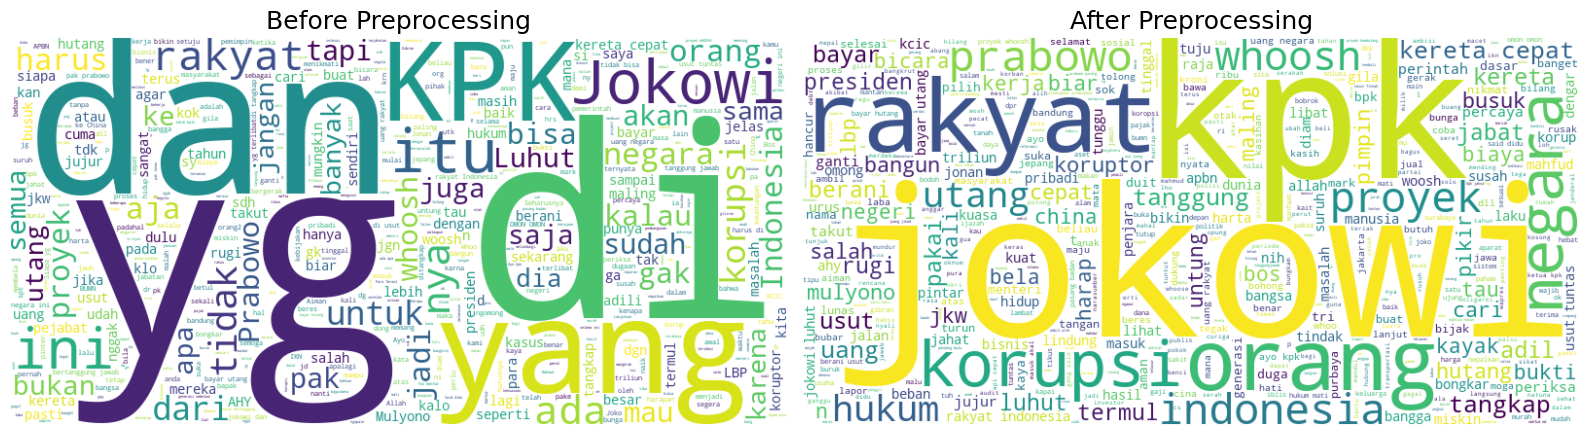

In [22]:
# Stopwords tambahan
stopwords = set(STOPWORDS)
stopwords.update([
    'https', 'co', 'RT', '...', 'amp', 'lu', 'deh', 'fyp',
    'ya', 'gue', 'sih', 'update', 'apk'
])

# =======================
# WordCloud BEFORE (raw comment)
# =======================
text_before = " ".join(df["comment"].astype(str).tolist())
wc_before = WordCloud(
    stopwords=stopwords,
    background_color="white",
    max_words=500,
    width=800,
    height=400
).generate(text_before)

# =======================
# WordCloud AFTER (stemming_data)
# =======================
text_after = " ".join(df["stemming_data"].astype(str).tolist())
wc_after = WordCloud(
    stopwords=stopwords,
    background_color="white",
    max_words=500,
    width=800,
    height=400
).generate(text_after)

# =======================
# Visualisasi Side-by-Side
# =======================
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wc_before, interpolation='bilinear')
plt.axis("off")
plt.title("Before Preprocessing", fontsize=18)

plt.subplot(1, 2, 2)
plt.imshow(wc_after, interpolation='bilinear')
plt.axis("off")
plt.title("After Preprocessing", fontsize=18)

plt.tight_layout()
plt.show()

## Frekuensi Kata

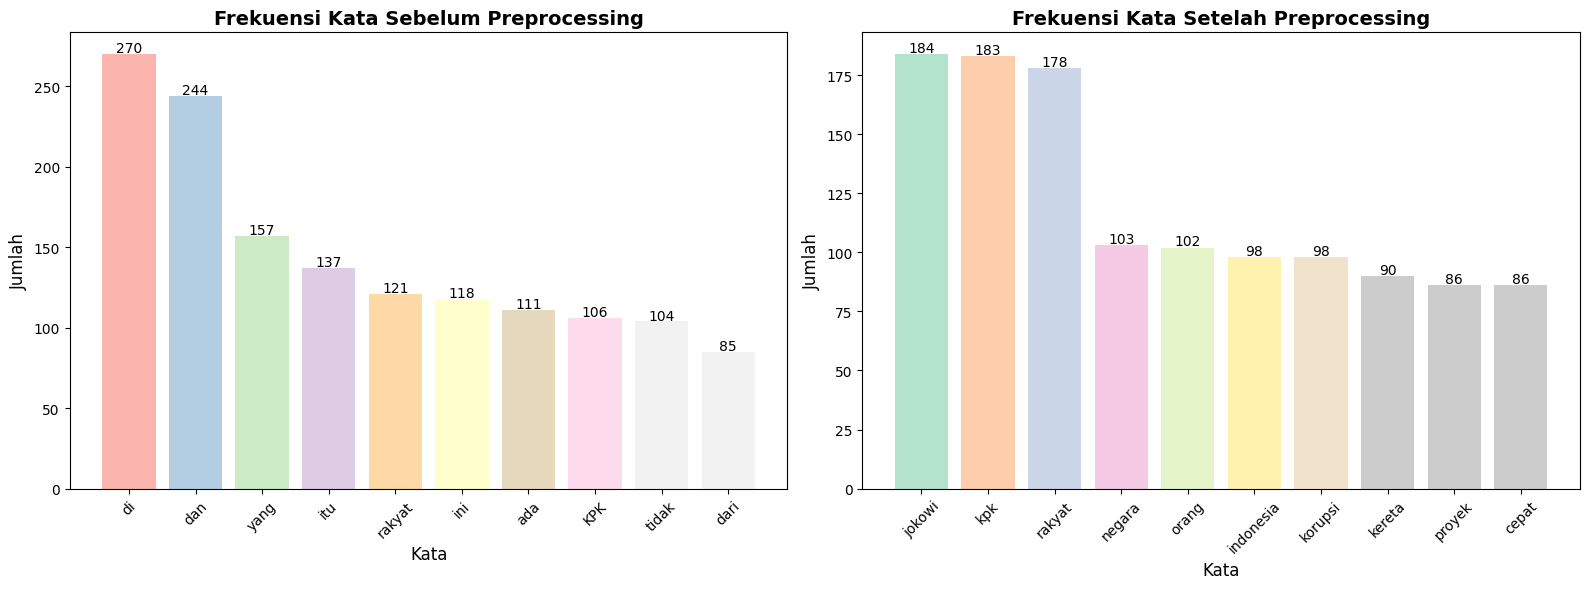

In [23]:
# Set stopwords tambahan
stopwords = set(STOPWORDS)
stopwords.update([
    'https', 'co', 'RT', '...', 'amp', 'lu', 'deh', 'fyp', 'ya', 'gue',
    'sih', 'yg', 'nya', 'aja', 'sdh', 'gak', 'ga', 'update', 'apk', 'ajar'
])

# ============================
# BEFORE (raw comment)
# ============================
all_text_before = " ".join(df["comment"].astype(str))
words_before = all_text_before.split()
filtered_words_before = [word for word in words_before if word.lower() not in stopwords]

word_counts_before = Counter(filtered_words_before)
top_words_before = word_counts_before.most_common(10)

word_before, count_before = zip(*top_words_before)

# ============================
# AFTER (stemming_data)
# ============================
all_text_after = " ".join(df["stemming_data"].astype(str))
words_after = all_text_after.split()
filtered_words_after = [word for word in words_after if word.lower() not in stopwords]

word_counts_after = Counter(filtered_words_after)
top_words_after = word_counts_after.most_common(10)

word_after, count_after = zip(*top_words_after)

# ============================
# Plot berdampingan
# ============================
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# BEFORE Plot
colors_before = plt.cm.Pastel1(range(len(word_before)))
bars1 = axes[0].bar(word_before, count_before, color=colors_before)
axes[0].set_title("Frekuensi Kata Sebelum Preprocessing", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Kata", fontsize=12)
axes[0].set_ylabel("Jumlah", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

for bar, count in zip(bars1, count_before):
    axes[0].text(bar.get_x() + bar.get_width()/2, count + 1, str(count), ha='center')

# AFTER Plot
colors_after = plt.cm.Pastel2(range(len(word_after)))
bars2 = axes[1].bar(word_after, count_after, color=colors_after)
axes[1].set_title("Frekuensi Kata Setelah Preprocessing", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Kata", fontsize=12)
axes[1].set_ylabel("Jumlah", fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

for bar, count in zip(bars2, count_after):
    axes[1].text(bar.get_x() + bar.get_width()/2, count + 1, str(count), ha='center')

plt.tight_layout()
plt.show()